<a href="https://colab.research.google.com/github/Ayash-Azhar/Machine-Learning-Notebooks/blob/main/Aidpal_injury_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#unzip dataset
!unzip /content/drive/MyDrive/Aidpal_yolo/merged_dataset.zip -d /content/


Archive:  /content/drive/MyDrive/Aidpal_yolo/merged_dataset.zip
   creating: /content/merged_dataset/
  inflating: /content/merged_dataset/data.yaml  
   creating: /content/merged_dataset/test/
   creating: /content/merged_dataset/test/images/
  inflating: /content/merged_dataset/test/images/0527copperhead2-max-640x480-1860279068_jpg.rf.c5a7158ec3d13221b65f4675a61385cc.jpg  
  inflating: /content/merged_dataset/test/images/12_webp.rf.4e00e211169340c7b66b834aa6274484.jpg  
  inflating: /content/merged_dataset/test/images/1st-degree-burn-1_jpg.rf.5d29629bc245054e769e19f1946f9175.jpg  
  inflating: /content/merged_dataset/test/images/1st-degree-burn_jpg.rf.54fa7922503a3ab01c018d0293533396.jpg  
  inflating: /content/merged_dataset/test/images/20130724-165603-56a2f5663df78cf7727b4bfa_webp.rf.1db0f4a9457988a6340be67e4c6c2924.jpg  
  inflating: /content/merged_dataset/test/images/222_jpg.rf.0ae6796aec1131eba59d0e01257045a3.jpg  
  inflating: /content/merged_dataset/test/images/256px-footpunc

In [3]:
#install ultralytics
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [6]:
#train the yolo v11s model
from ultralytics import YOLO

# Load YOLOv11s (small) pre-trained weights
model = YOLO("yolo11s.pt")

# Train on your merged wound dataset
results = model.train(
    data="/content/merged_dataset/data.yaml",
    epochs=60,
    imgsz=640,
    batch=16,
    patience=10,         # Early stopping if val performance doesn't improve
    lr0=0.001,            # Learning rate
    optimizer="SGD",      # Optimizer ('SGD' or 'Adam')
    workers=2,
    verbose=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 127MB/s]


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/merged_dataset/data.yaml, epochs=60, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 21.9MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.2MB/s]


AMP: checks passed ✅


train: Scanning /content/merged_dataset/train/labels... 1375 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1375/1375 [00:01<00:00, 800.97it/s]


train: New cache created: /content/merged_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/merged_dataset/valid/labels... 206 images, 1 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<00:00, 616.09it/s]

val: New cache created: /content/merged_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      4.07G      2.022      3.431      2.118         41        640: 100%|██████████| 86/86 [00:31<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        206        295      0.282      0.165     0.0628      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      4.87G      1.932        2.7      2.082         38        640: 100%|██████████| 86/86 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]


                   all        206        295      0.377      0.154     0.0661     0.0233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      4.91G      1.913      2.563      2.057         45        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        206        295      0.278      0.175      0.107     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      4.95G      1.928      2.486      2.073         32        640: 100%|██████████| 86/86 [00:26<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        206        295      0.408      0.164      0.146      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      4.99G      1.891      2.327      2.053         34        640: 100%|██████████| 86/86 [00:27<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        206        295      0.377      0.251      0.203     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      5.03G       1.89      2.261      2.017         36        640: 100%|██████████| 86/86 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        206        295      0.472      0.201      0.178     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      5.07G      1.851      2.245      1.986         45        640: 100%|██████████| 86/86 [00:28<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]


                   all        206        295      0.681      0.217      0.189     0.0774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      5.11G      1.845      2.146      1.967         42        640: 100%|██████████| 86/86 [00:28<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        206        295      0.501      0.225      0.155      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      5.15G      1.811      2.131      1.952         33        640: 100%|██████████| 86/86 [00:27<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        206        295      0.413      0.254      0.227        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      5.19G      1.769      2.094      1.947         40        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        206        295      0.477      0.207      0.202     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      5.23G      1.778      2.087      1.926         28        640: 100%|██████████| 86/86 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        206        295      0.498      0.223      0.184     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      5.27G       1.76      1.957      1.894         50        640: 100%|██████████| 86/86 [00:28<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        206        295      0.591      0.238      0.241     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      5.31G      1.729      1.921       1.87         35        640: 100%|██████████| 86/86 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        206        295      0.468      0.371      0.302      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      5.35G      1.731      1.882       1.87         34        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        206        295      0.602      0.276      0.259      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      5.39G      1.713      1.886      1.852         47        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        206        295      0.573      0.207      0.215      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      5.43G      1.678      1.809      1.863         45        640: 100%|██████████| 86/86 [00:26<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]


                   all        206        295      0.647      0.258      0.275      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      5.47G       1.67      1.781      1.827         41        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]

                   all        206        295      0.456       0.28      0.254      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      5.51G      1.676      1.769      1.832         42        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        206        295      0.606       0.27      0.274      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      5.55G      1.637       1.73      1.821         40        640: 100%|██████████| 86/86 [00:27<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        206        295      0.653      0.288      0.305      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      5.59G      1.621      1.682       1.79         31        640: 100%|██████████| 86/86 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        206        295      0.731      0.278      0.326      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      5.63G      1.597      1.586      1.765         40        640: 100%|██████████| 86/86 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        206        295      0.487      0.375      0.303      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      5.67G      1.607       1.63      1.781         42        640: 100%|██████████| 86/86 [00:27<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        206        295      0.486      0.416      0.367       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      5.71G      1.591      1.598      1.761         29        640: 100%|██████████| 86/86 [00:26<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        206        295      0.627      0.342      0.375      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      5.75G      1.583      1.542      1.758         51        640: 100%|██████████| 86/86 [00:27<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        206        295      0.697      0.267      0.361      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      5.79G      1.528      1.527       1.72         38        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        206        295      0.739      0.292      0.329      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      5.83G      1.544      1.449      1.725         35        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        206        295      0.666      0.326      0.358       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      5.87G      1.516      1.467      1.702         45        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        206        295      0.483      0.425      0.373      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      5.91G       1.48      1.408      1.681         50        640: 100%|██████████| 86/86 [00:27<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        206        295      0.485      0.475      0.383      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      5.95G      1.464      1.396      1.665         32        640: 100%|██████████| 86/86 [00:27<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        206        295      0.697      0.324      0.345      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      5.99G      1.458      1.355      1.664         41        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        206        295      0.514      0.312      0.333      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      6.02G      1.449      1.317      1.667         36        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        206        295      0.763      0.338      0.347      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      6.06G      1.442      1.284      1.644         49        640: 100%|██████████| 86/86 [00:27<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        206        295      0.514       0.36      0.345      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60       6.1G      1.432      1.289      1.635         57        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        206        295      0.805       0.31      0.378      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      6.14G      1.427      1.302      1.643         36        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        206        295      0.742      0.326      0.364      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      6.18G      1.398      1.214      1.618         40        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        206        295      0.679      0.366      0.377      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      6.22G      1.399      1.227      1.595         52        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        206        295      0.543      0.448      0.394      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      6.26G      1.388      1.228      1.608         43        640: 100%|██████████| 86/86 [00:27<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


                   all        206        295      0.674      0.356      0.369      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60       6.3G      1.361       1.17      1.577         32        640: 100%|██████████| 86/86 [00:26<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        206        295       0.58      0.386      0.401      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      6.34G       1.35      1.171      1.576         47        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        206        295      0.581       0.38      0.402      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      6.38G      1.321      1.142      1.551         40        640: 100%|██████████| 86/86 [00:27<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        206        295      0.701      0.369      0.357      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      6.42G      1.298       1.12      1.538         43        640: 100%|██████████| 86/86 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        206        295      0.664      0.411      0.397      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      6.46G      1.264      1.055      1.511         27        640: 100%|██████████| 86/86 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        206        295      0.765      0.358      0.376      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       6.5G      1.287      1.062      1.521         29        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        206        295      0.682      0.452      0.445      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      6.54G      1.276      1.064      1.515         43        640: 100%|██████████| 86/86 [00:27<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        206        295      0.592      0.467      0.415      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      6.58G      1.234      1.007      1.483         35        640: 100%|██████████| 86/86 [00:26<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        206        295      0.589      0.392      0.394      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      6.62G      1.232     0.9945      1.481         49        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        206        295      0.642      0.508      0.454      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      6.66G      1.218     0.9902      1.467         37        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        206        295      0.787      0.367        0.4       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60       6.7G      1.209     0.9986      1.466         39        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        206        295       0.62      0.474      0.441      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      6.74G      1.195     0.9678      1.448         33        640: 100%|██████████| 86/86 [00:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]

                   all        206        295      0.637      0.393      0.426      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      6.78G      1.157     0.9256       1.43         37        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        206        295      0.639      0.364        0.4      0.229


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      6.82G      1.118     0.7428      1.464         17        640: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        206        295      0.599      0.397      0.402      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      6.86G      1.057     0.6621      1.414         28        640: 100%|██████████| 86/86 [00:26<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        206        295      0.608      0.402      0.446      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60       6.9G      1.046     0.6638      1.405         18        640: 100%|██████████| 86/86 [00:26<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        206        295      0.601      0.392      0.412      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      6.94G      1.011     0.6382      1.385         15        640: 100%|██████████| 86/86 [00:26<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        206        295      0.683      0.405      0.437      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      6.98G      1.007     0.6277      1.376         21        640: 100%|██████████| 86/86 [00:26<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        206        295       0.65      0.386      0.424      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      7.02G     0.9908     0.6026      1.359         19        640: 100%|██████████| 86/86 [00:26<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        206        295      0.664      0.408      0.454       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      7.06G     0.9671     0.5868      1.344         19        640: 100%|██████████| 86/86 [00:26<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        206        295      0.668      0.406      0.436      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      7.43G     0.9468     0.5803      1.327         16        640: 100%|██████████| 86/86 [00:26<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        206        295      0.653      0.412      0.444      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      7.46G     0.9366     0.5637      1.321         26        640: 100%|██████████| 86/86 [00:26<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        206        295      0.636      0.421      0.443      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60       7.5G     0.9262     0.5762      1.306         17        640: 100%|██████████| 86/86 [00:26<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        206        295       0.65      0.408       0.44      0.257



60 epochs completed in 0.505 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


                   all        206        295       0.78      0.464      0.512      0.273
                  Burn         22         51      0.573      0.294      0.399      0.236
              Abrasion         34         46      0.792      0.826      0.836      0.522
                Bruise         42         65      0.874      0.585      0.649      0.382
                   Cut         58         71      0.824      0.792      0.859      0.547
              Puncture         50         59      0.543      0.254      0.319      0.164
    Sprain-Dislocation          2          2      0.854        0.5      0.519     0.0598
           Head Injury          1          1          1          0          0          0
Speed: 0.3ms preprocess, 15.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


In [7]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
#loading model from drive
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Aidpal_yolo/best.pt")

In [12]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/Aidpal_yolo/best.pt")

# Run prediction on test set
results = model.predict(
    source="/content/merged_dataset/test/images",  # folder of test images
    save=True,
    save_txt=True,
    conf=0.25,
    imgsz=640
)



image 1/122 /content/merged_dataset/test/images/0527copperhead2-max-640x480-1860279068_jpg.rf.c5a7158ec3d13221b65f4675a61385cc.jpg: 640x640 1 Puncture, 15.6ms
image 2/122 /content/merged_dataset/test/images/12_webp.rf.4e00e211169340c7b66b834aa6274484.jpg: 640x640 (no detections), 15.7ms
image 3/122 /content/merged_dataset/test/images/1st-degree-burn-1_jpg.rf.5d29629bc245054e769e19f1946f9175.jpg: 640x640 1 Burn, 15.6ms
image 4/122 /content/merged_dataset/test/images/1st-degree-burn_jpg.rf.54fa7922503a3ab01c018d0293533396.jpg: 640x640 1 Burn, 15.6ms
image 5/122 /content/merged_dataset/test/images/20130724-165603-56a2f5663df78cf7727b4bfa_webp.rf.1db0f4a9457988a6340be67e4c6c2924.jpg: 640x640 1 Burn, 15.6ms
image 6/122 /content/merged_dataset/test/images/222_jpg.rf.0ae6796aec1131eba59d0e01257045a3.jpg: 640x640 2 Punctures, 14.8ms
image 7/122 /content/merged_dataset/test/images/256px-footpuncture_jpg.rf.1fb1d9dc72e25f6c6f0733562f35dbcb.jpg: 640x640 1 Puncture, 13.4ms
image 8/122 /content/me

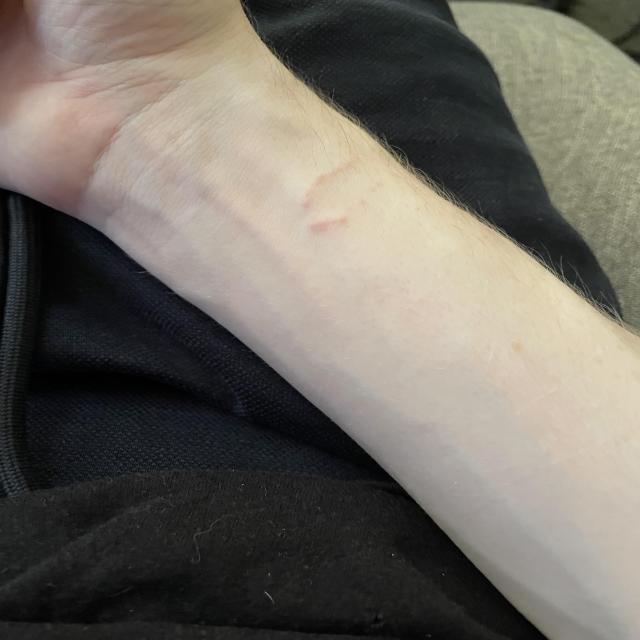

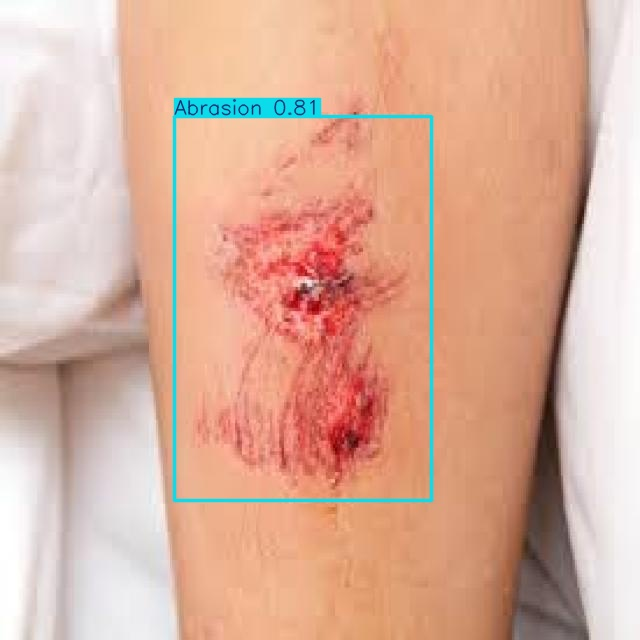

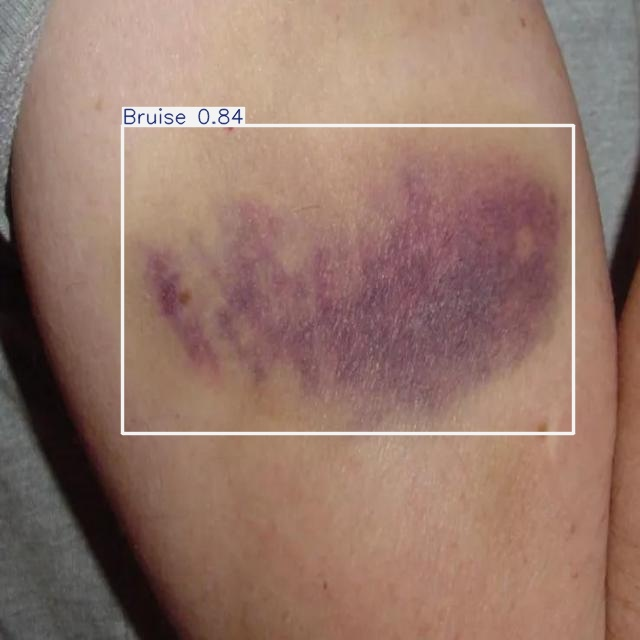

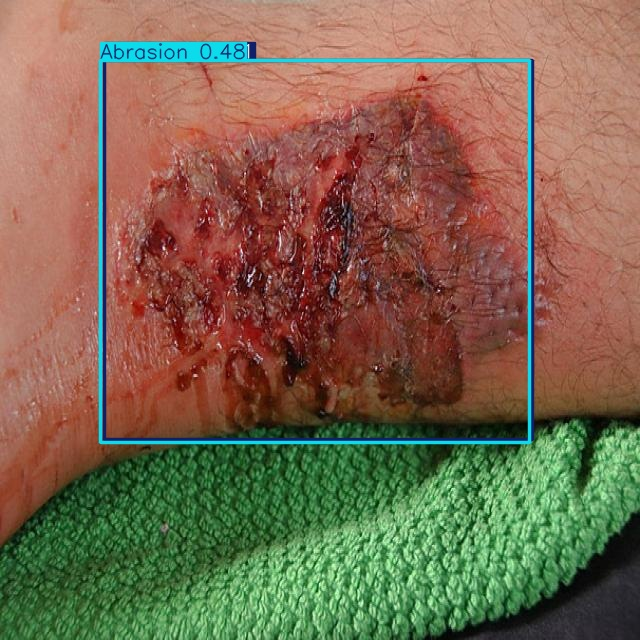

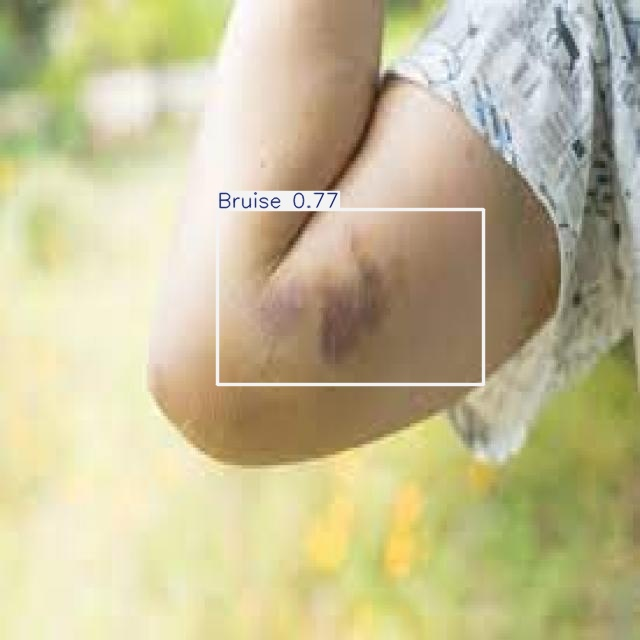

In [13]:
#preview predictions
from IPython.display import Image, display
import glob

for img_path in glob.glob('/content/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=img_path))


In [16]:
#test on uploaded image
from google.colab import files
uploaded = files.upload()  # choose a .jpg or .png

# Run prediction on the uploaded image
results = model.predict(source=list(uploaded.keys())[0], save=True)


Saving cut (9).jpg to cut (9).jpg

image 1/1 /content/cut (9).jpg: 640x640 1 Cut, 18.8ms
Speed: 2.5ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
103 labels saved to runs/detect/predict/labels


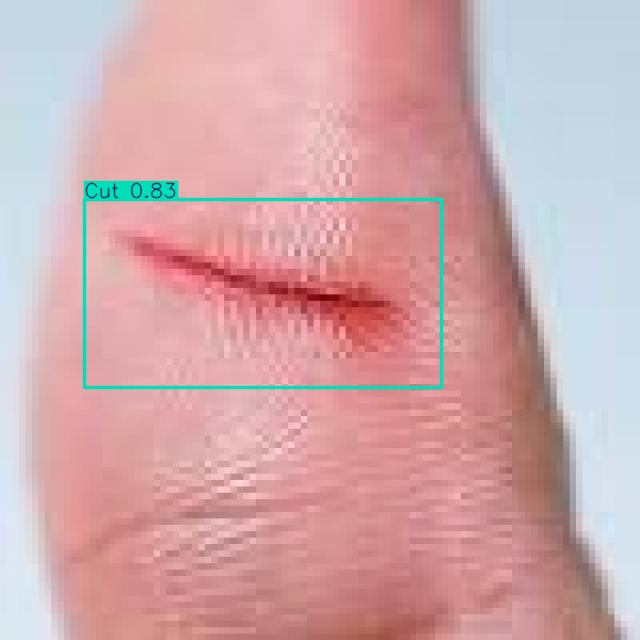

In [19]:
from IPython.display import Image, display

display(Image(filename='/content/runs/detect/predict/cut (9).jpg'))


In [20]:
#test on uploaded image
from google.colab import files
uploaded = files.upload()  # choose a .jpg or .png

# Run prediction on the uploaded image
results = model.predict(source=list(uploaded.keys())[0], save=True)


Saving burns (8).jpg to burns (8).jpg

image 1/1 /content/burns (8).jpg: 640x640 1 Abrasion, 15.8ms
Speed: 2.4ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
104 labels saved to runs/detect/predict/labels


In [5]:
#new training run after adding images of burn to dataset
from ultralytics import YOLO

# Load previously trained weights
model = YOLO("/content/drive/MyDrive/Aidpal_yolo/best.pt")

# Start a new training session using these weights
model.train(
    data="/content/merged_dataset/data.yaml",
    epochs=30,              # fresh 30 epochs with new Burn images
    imgsz=640,
    batch=16,
    lr0=0.0005,
    optimizer="AdamW",
    augment=True
)


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Aidpal_yolo/best.pt, data=/content/merged_dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

train: Scanning /content/merged_dataset/train/labels.cache... 1470 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/merged_dataset/valid/labels.cache... 206 images, 1 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.11G      1.376      1.239      1.595         33        640: 100%|██████████| 92/92 [00:35<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        206        295      0.766      0.322      0.348      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.91G      1.406      1.274      1.605         31        640: 100%|██████████| 92/92 [00:33<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        206        295      0.562      0.372      0.378      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.91G      1.436       1.32      1.631         54        640: 100%|██████████| 92/92 [00:31<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        206        295      0.534      0.476      0.398      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.95G      1.431      1.364      1.633         57        640: 100%|██████████| 92/92 [00:32<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        206        295      0.636      0.357      0.338      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.95G      1.441      1.398      1.642         28        640: 100%|██████████| 92/92 [00:31<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        206        295      0.748       0.32      0.367      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.95G      1.408      1.315      1.632         33        640: 100%|██████████| 92/92 [00:31<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        206        295      0.709      0.357       0.37      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.95G      1.433      1.301      1.631         38        640: 100%|██████████| 92/92 [00:32<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        206        295      0.711      0.355      0.382      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.95G      1.415      1.331      1.628         38        640: 100%|██████████| 92/92 [00:32<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        206        295      0.669      0.369      0.366      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.95G      1.364      1.241       1.59         38        640: 100%|██████████| 92/92 [00:31<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        206        295      0.547      0.387      0.371      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.97G      1.357       1.25      1.589         39        640: 100%|██████████| 92/92 [00:31<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all        206        295      0.565       0.49      0.461      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.97G      1.333      1.161      1.546         31        640: 100%|██████████| 92/92 [00:31<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        206        295      0.704      0.397      0.409      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.97G      1.303      1.147      1.532         45        640: 100%|██████████| 92/92 [00:32<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        206        295      0.521      0.367      0.429      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.01G      1.307      1.169      1.547         27        640: 100%|██████████| 92/92 [00:31<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        206        295      0.592      0.379      0.394      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.01G      1.286      1.132      1.529         32        640: 100%|██████████| 92/92 [00:31<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        206        295        0.8      0.358        0.4      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.01G      1.248      1.069      1.501         28        640: 100%|██████████| 92/92 [00:31<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        206        295       0.59      0.389      0.394      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.05G      1.235      1.026      1.478         42        640: 100%|██████████| 92/92 [00:31<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        206        295      0.741      0.446      0.479      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.05G      1.233       1.03      1.484         31        640: 100%|██████████| 92/92 [00:32<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        206        295      0.633      0.372      0.396      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.05G      1.197      1.005      1.459         29        640: 100%|██████████| 92/92 [00:31<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        206        295      0.437      0.551      0.488      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.05G      1.181     0.9741      1.446         46        640: 100%|██████████| 92/92 [00:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]

                   all        206        295      0.683      0.488      0.506      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.05G      1.174     0.9672      1.425         36        640: 100%|██████████| 92/92 [00:31<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        206        295      0.442       0.52      0.471       0.26


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.05G      1.083     0.7374      1.424         16        640: 100%|██████████| 92/92 [00:32<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        206        295      0.706      0.488      0.495      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.05G       1.04     0.6751      1.397         18        640: 100%|██████████| 92/92 [00:30<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        206        295      0.788      0.473      0.509      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.05G     0.9967     0.6476       1.36         19        640: 100%|██████████| 92/92 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        206        295      0.748      0.474      0.515      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.05G     0.9727       0.62       1.33         31        640: 100%|██████████| 92/92 [00:30<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        206        295      0.651      0.513      0.493      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.05G     0.9592     0.6026      1.322         14        640: 100%|██████████| 92/92 [00:30<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        206        295      0.788      0.455       0.53      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.09G     0.9372     0.5761        1.3         20        640: 100%|██████████| 92/92 [00:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        206        295      0.415      0.538      0.469      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.09G     0.8949     0.5812      1.281         23        640: 100%|██████████| 92/92 [00:30<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        206        295       0.65      0.436      0.454       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.13G     0.8883      0.554      1.283         19        640: 100%|██████████| 92/92 [00:30<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        206        295      0.689      0.569      0.549      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.13G     0.8638     0.5436      1.258         15        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        206        295        0.7      0.602      0.554       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.13G     0.8526     0.5365      1.249         18        640: 100%|██████████| 92/92 [00:30<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        206        295      0.687      0.582      0.557      0.286



30 epochs completed in 0.291 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 19.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]


                   all        206        295      0.571      0.518      0.523      0.293
                  Burn         22         51      0.564       0.38      0.359      0.199
              Abrasion         34         46      0.731      0.913      0.866      0.571
                Bruise         42         65      0.749      0.631      0.627      0.372
                   Cut         58         71      0.783      0.831       0.82      0.585
              Puncture         50         59      0.398      0.373      0.324      0.191
    Sprain-Dislocation          2          2      0.772        0.5      0.662      0.135
           Head Injury          1          1          0          0          0          0
Speed: 0.3ms preprocess, 14.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8af21cc090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [8]:
#download fine tuned model
from google.colab import files
files.download('runs/detect/train2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
#testing model
from ultralytics import YOLO

# Load your fine-tuned model
model = YOLO("/content/drive/MyDrive/Aidpal_yolo/final_model.pt")

# Run prediction on the test images
model.predict(
    source="/content/merged_dataset/test/images",
    save=True,         # Save predicted images
    save_txt=True,     # Save label text files
    conf=0.25,         # Confidence threshold (you can tune this)
    imgsz=640
)



image 1/122 /content/merged_dataset/test/images/0527copperhead2-max-640x480-1860279068_jpg.rf.c5a7158ec3d13221b65f4675a61385cc.jpg: 640x640 (no detections), 18.7ms
image 2/122 /content/merged_dataset/test/images/12_webp.rf.4e00e211169340c7b66b834aa6274484.jpg: 640x640 1 Burn, 17.2ms
image 3/122 /content/merged_dataset/test/images/1st-degree-burn-1_jpg.rf.5d29629bc245054e769e19f1946f9175.jpg: 640x640 1 Burn, 15.6ms
image 4/122 /content/merged_dataset/test/images/1st-degree-burn_jpg.rf.54fa7922503a3ab01c018d0293533396.jpg: 640x640 1 Burn, 15.6ms
image 5/122 /content/merged_dataset/test/images/20130724-165603-56a2f5663df78cf7727b4bfa_webp.rf.1db0f4a9457988a6340be67e4c6c2924.jpg: 640x640 (no detections), 15.6ms
image 6/122 /content/merged_dataset/test/images/222_jpg.rf.0ae6796aec1131eba59d0e01257045a3.jpg: 640x640 2 Punctures, 15.6ms
image 7/122 /content/merged_dataset/test/images/256px-footpuncture_jpg.rf.1fb1d9dc72e25f6c6f0733562f35dbcb.jpg: 640x640 1 Puncture, 15.6ms
image 8/122 /conte

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Burn', 1: 'Abrasion', 2: 'Bruise', 3: 'Cut', 4: 'Puncture', 5: 'Sprain-Dislocation', 6: 'Head Injury'}
 obb: None
 orig_img: array([[[ 61,  50,  36],
         [ 59,  48,  34],
         [ 57,  46,  32],
         ...,
         [ 55,  60,  45],
         [ 55,  60,  45],
         [ 55,  60,  45]],
 
        [[ 61,  50,  36],
         [ 59,  48,  34],
         [ 57,  46,  32],
         ...,
         [ 55,  60,  45],
         [ 55,  60,  45],
         [ 55,  60,  45]],
 
        [[ 58,  49,  35],
         [ 57,  48,  34],
         [ 55,  46,  32],
         ...,
         [ 55,  60,  45],
         [ 55,  60,  45],
         [ 55,  60,  45]],
 
        ...,
 
        [[ 75,  84,  81],
         [ 76,  85,  82],
         [ 78,  87,  84],
         ...,
         [ 98, 104, 103],
         [ 98, 104, 103],
         [ 98, 104, 103]],
 
        [[ 74,  

✅ After Running:
The results will be saved in:

swift
Copy code
/content/runs/detect/predict

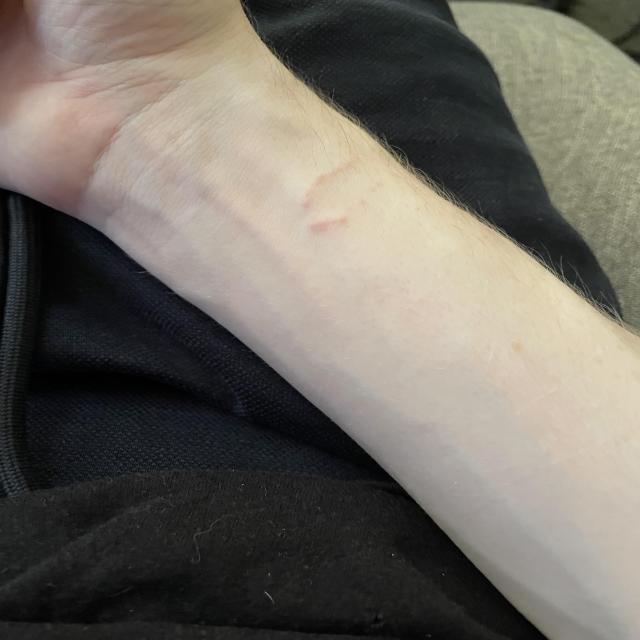

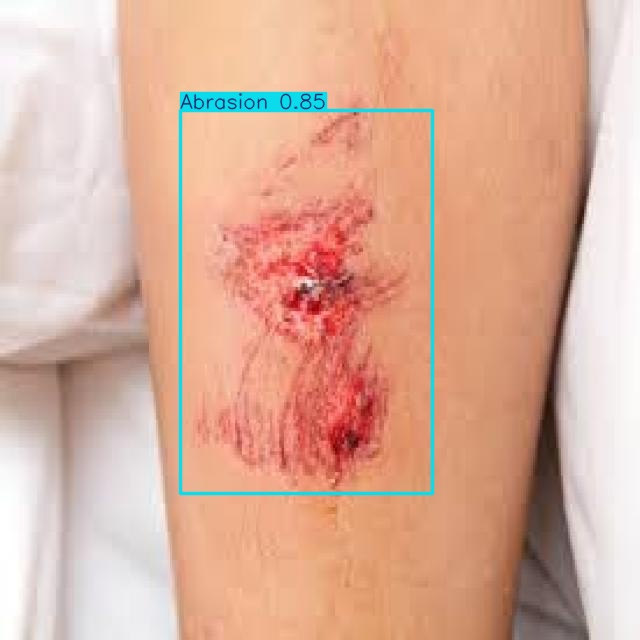

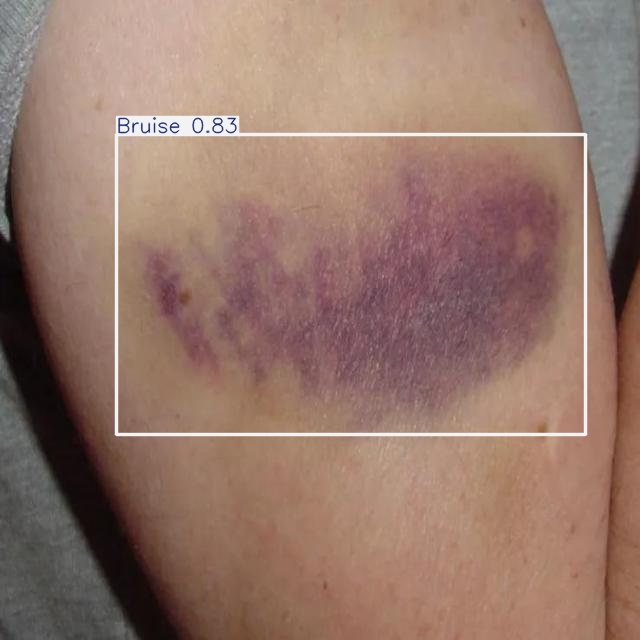

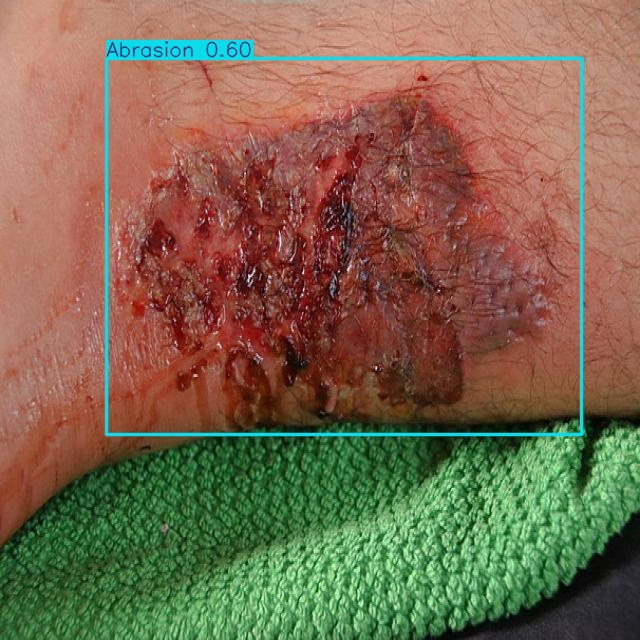

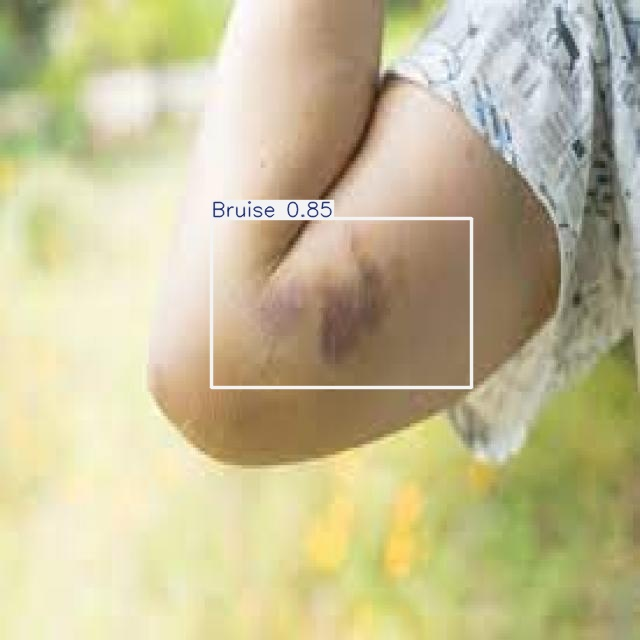

In [11]:
#preview test
import glob
from IPython.display import Image, display

# Show the first 5 predicted images
for image_path in glob.glob("/content/runs/detect/predict/*.jpg")[:5]:
    display(Image(filename=image_path))


In [12]:
#test1 on uploaded image
from google.colab import files
uploaded = files.upload()  # choose a .jpg or .png

# Run prediction on the uploaded image
results = model.predict(source=list(uploaded.keys())[0], save=True)


Saving _96567440_2017-06-20-photo-00000017_jpg.rf.fb4f9d81f9c1e6730841c63267671256.jpg to _96567440_2017-06-20-photo-00000017_jpg.rf.fb4f9d81f9c1e6730841c63267671256.jpg

image 1/1 /content/_96567440_2017-06-20-photo-00000017_jpg.rf.fb4f9d81f9c1e6730841c63267671256.jpg: 640x640 1 Burn, 15.9ms
Speed: 3.1ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
108 labels saved to runs/detect/predict/labels


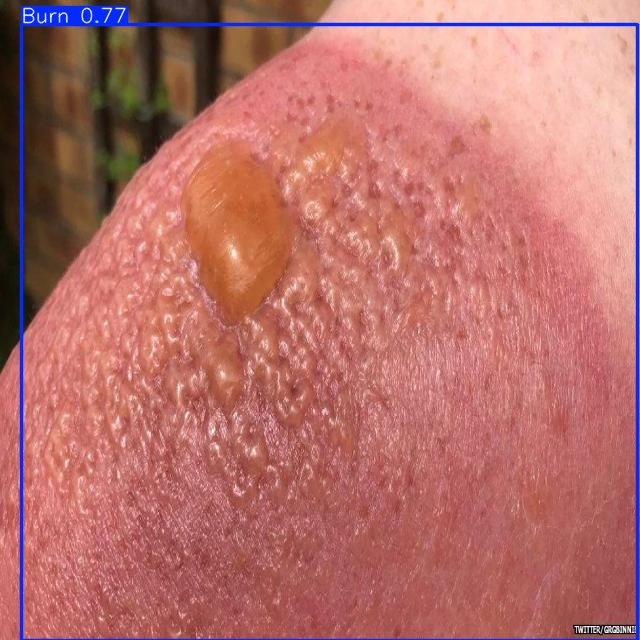

In [13]:
from IPython.display import Image, display

display(Image(filename='/content/runs/detect/predict/_96567440_2017-06-20-photo-00000017_jpg.rf.fb4f9d81f9c1e6730841c63267671256.jpg'))


In [14]:
#test2 on uploaded image
from google.colab import files
uploaded = files.upload()  # choose a .jpg or .png

# Run prediction on the uploaded image
results = model.predict(source=list(uploaded.keys())[0], save=True)

Saving cut (15).jpg to cut (15).jpg

image 1/1 /content/cut (15).jpg: 640x640 1 Cut, 15.8ms
Speed: 3.1ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
109 labels saved to runs/detect/predict/labels


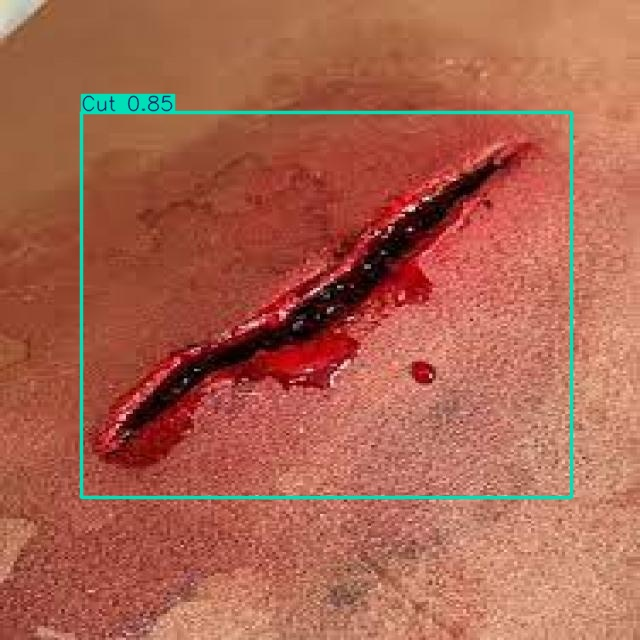

In [16]:
#display result
from IPython.display import Image, display

display(Image(filename='/content/runs/detect/predict/cut (15).jpg'))
